# Human Activity Recognition with Smartphones

Import Libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix

Read train and test data

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
frames = [train_data, test_data]
data = pd.concat(frames)

In [4]:
#Put train and test data in the same dataframe
data.shape

(10299, 563)

In [5]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [6]:
data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284,16.146422
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898,8.679067
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880,9.000000
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882,17.000000
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970,24.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


Check for null values in training data

In [7]:
data.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

Variables

In [8]:
activities = data['Activity'].unique()
activity_frequency= np.array(data['Activity'].value_counts())

In [9]:
activities

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

Plot data distribution

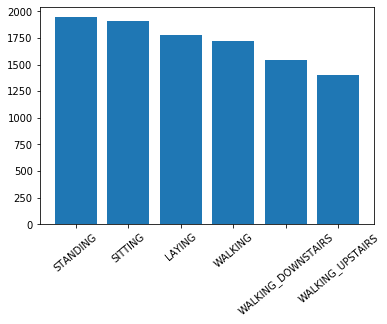

In [10]:
fig, ax = plt.subplots()
ax.bar(activities, activity_frequency)
plt.xticks(rotation = 40)
plt.show()

# Use PCA(Principal Component Analysis) for dimensionality reduction

In [11]:
#Separating the features
X_data = data.loc[:,data.columns[:-1]].values

In [12]:
# Standardizing the features
#The main idea is to normalize/standardize (mean = 0 and standard deviation = 1) your features/variables/columns of X 
#before applying Machine learning techniques.
data_scaled = StandardScaler().fit_transform(X_data)

In [13]:
pca = PCA(n_components=.99)
principalComponents = pca.fit_transform(data_scaled)
#How much each component contributed
print('Each component variance \n', pca.explained_variance_ratio_.round(2), '\n')

#PCA variance - sum of the component's variance 
print('PCA variance:\n', sum(pca.explained_variance_ratio_))

#Put the components into a DataFrame
principalDf = pd.DataFrame(data=principalComponents)
principalDf


principalComponents.shape

Each component variance 
 [0.51 0.06 0.03 0.02 0.02 0.02 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ] 

PCA variance:
 0.9900138988706897


(10299, 182)

# Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
y = data.loc[:,'Activity']

In [16]:
principalDf.shape

(10299, 182)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(principalDf, y, test_size = 0.3, random_state = 0)

# K Neares Neighbors

In [26]:
from sklearn.neighbors import KNeighborsClassifier

Find the best K value

In [ ]:
error_rate = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Train the model

In [27]:
knn = KNeighborsClassifier(n_neighbors=9)

In [28]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [29]:
y_pred = knn.predict(X_test)

Plot confusion matrix

Text(0.5, 1, 'KNN Confusion Matrix')

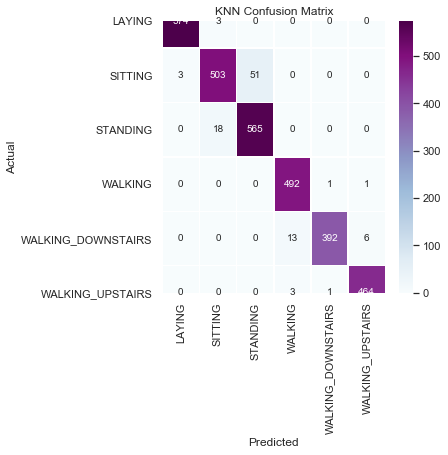

In [30]:
cf_matrix = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cf_matrix, columns=np.unique(y_test), index = np.unique(y_pred))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.set(font_scale=1) #for label size
sns.heatmap(df_cm,cmap="BuPu",fmt="d", annot=True, annot_kws={"size": 10}, linewidths=.5)# font size
plt.title('KNN Confusion Matrix')

In [31]:
print('Classification Report' + classification_report(y_test, y_pred))

Classification Report                    precision    recall  f1-score   support

            LAYING       0.99      0.99      0.99       577
           SITTING       0.96      0.90      0.93       557
          STANDING       0.92      0.97      0.94       583
           WALKING       0.97      1.00      0.98       494
WALKING_DOWNSTAIRS       0.99      0.95      0.97       411
  WALKING_UPSTAIRS       0.99      0.99      0.99       468

          accuracy                           0.97      3090
         macro avg       0.97      0.97      0.97      3090
      weighted avg       0.97      0.97      0.97      3090



# Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

Tunning hyperparameters

In [ ]:
from sklearn.metrics import accuracy_score
#number of trees
n_estimators = [2, 20, 45, 50, 64, 100, 200]
#max number of levels in each tree
max_depth = [10, 20, 30, 40, 50]
#minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20]
#minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10, 15]


for n in n_estimators:
    for d in max_depth:
        for minS in min_samples_split:
            for minL in min_samples_leaf:
                rfc = RandomForestClassifier(n_estimators=n, max_depth=d, min_samples_split=minS, min_samples_leaf=minL)
                rfc.fit(X_train, y_train)
                rfc_pred = rfc.predict(X_test)
                print(n, "trees, ", d," depth", minS, "min_samples_split", minL, "min_samples_leaf")
                print(accuracy_score(y_test,rfc_pred))

In [19]:
rfc = RandomForestClassifier(n_estimators=64)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=64,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
rfc_pred = rfc.predict(X_test)

Text(0.5, 1, 'Random Forest Confusion Matrix')

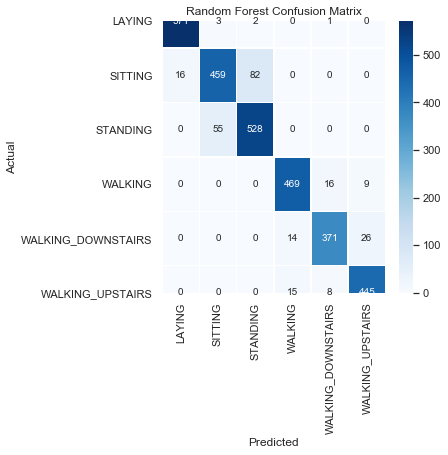

In [25]:
cf_matrix = confusion_matrix(y_test,rfc_pred)
df_cm = pd.DataFrame(cf_matrix, columns=np.unique(y_test), index = np.unique(rfc_pred))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.set(font_scale=1) #for label size
sns.heatmap(df_cm,cmap="Blues",fmt="d", annot=True, annot_kws={"size": 10}, linewidths=.5)# font size
plt.title('Random Forest Confusion Matrix')

In [24]:
print(classification_report(y_test,rfc_pred))

                    precision    recall  f1-score   support

            LAYING       0.97      0.99      0.98       577
           SITTING       0.89      0.82      0.85       557
          STANDING       0.86      0.91      0.88       583
           WALKING       0.94      0.95      0.95       494
WALKING_DOWNSTAIRS       0.94      0.90      0.92       411
  WALKING_UPSTAIRS       0.93      0.95      0.94       468

          accuracy                           0.92      3090
         macro avg       0.92      0.92      0.92      3090
      weighted avg       0.92      0.92      0.92      3090



# Gaussian Naive Bayes